In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
from scipy.signal import find_peaks

%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0906/DD0906')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0907/DD0907')
ds3 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0956/DD0956')



yt : [INFO     ] 2019-01-15 11:53:52,152 Parameters: current_time              = 295.316463725
yt : [INFO     ] 2019-01-15 11:53:52,153 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-15 11:53:52,155 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-15 11:53:52,157 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-15 11:53:52,158 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-15 11:53:52,159 Parameters: current_redshift          = 0.900132268192
yt : [INFO     ] 2019-01-15 11:53:52,161 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-01-15 11:53:52,162 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-01-15 11:53:52,164 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-01-15 11:53:52,195 Parameters: current_time              = 295.566463923
yt : [INFO     ] 2019-01-15 11:53:52,196 Parameters: domain_dimensions         = [256 256 2

In [3]:
print 'ds1: %.5f'% ds1.current_redshift
print 'ds2: %.5f'% ds2.current_redshift
print 'ds3: %.5f'% ds3.current_redshift





ds1: 0.90013
ds2: 0.89895
ds3: 0.84265


In [5]:
cen1 = yt.YTArray([ds1.quan(0.4922914505, 'code_length'), ds1.quan(0.482047080994, 'code_length'), ds1.quan(0.504963874817, 'code_length')]).to('kpc')
cen2 = yt.YTArray([ds2.quan(0.492289543152, 'code_length'), ds2.quan(0.48203754425, 'code_length'), ds2.quan(0.504967689514, 'code_length')]).to('kpc')
cen3 = yt.YTArray([ds3.quan(0.49216556549072266, 'code_length'), ds3.quan(0.48153591156005865, 'code_length'), ds3.quan(0.5051298141479492, 'code_length')]).to('kpc')




Parsing Hierarchy : 100%|██████████| 4732/4732 [00:00<00:00, 21307.55it/s]
yt : [INFO     ] 2019-01-15 11:54:11,908 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-01-15 11:54:38,062 Projection completed
yt : [INFO     ] 2019-01-15 11:54:38,064 xlim = 36427.349542 36577.349542
yt : [INFO     ] 2019-01-15 11:54:38,066 ylim = 38162.692108 38312.692108
yt : [INFO     ] 2019-01-15 11:54:38,068 xlim = 0.481057 0.483038
yt : [INFO     ] 2019-01-15 11:54:38,070 ylim = 0.503973 0.505954
yt : [INFO     ] 2019-01-15 11:54:38,073 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



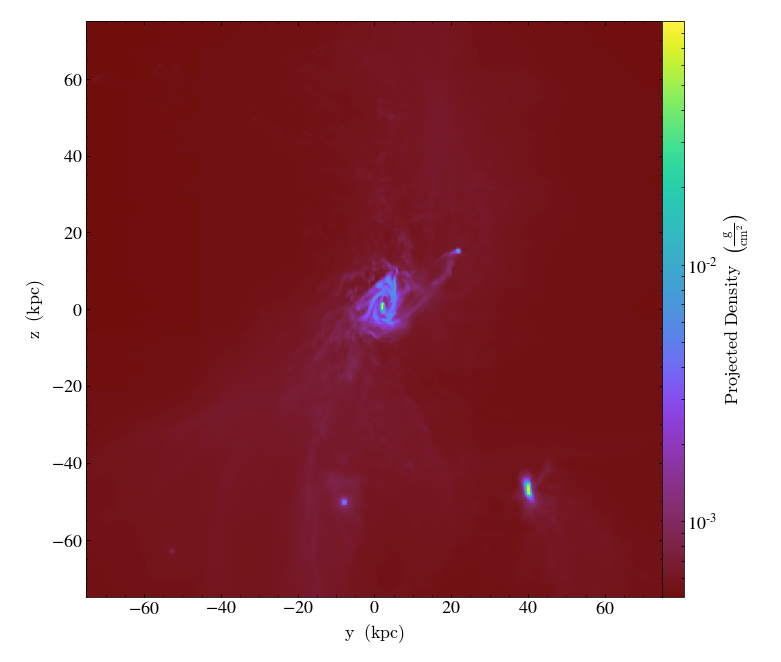

In [6]:
yt.ProjectionPlot(ds1, 'x', 'density', center=cen1, width = (150,'kpc'))

Parsing Hierarchy : 100%|██████████| 4609/4609 [00:00<00:00, 17225.41it/s]
yt : [INFO     ] 2019-01-15 11:54:45,898 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-01-15 11:55:12,332 Projection completed
yt : [INFO     ] 2019-01-15 11:55:12,334 xlim = 36449.432705 36599.432705
yt : [INFO     ] 2019-01-15 11:55:12,335 ylim = 38186.871122 38336.871122
yt : [INFO     ] 2019-01-15 11:55:12,338 xlim = 0.481048 0.483027
yt : [INFO     ] 2019-01-15 11:55:12,339 ylim = 0.503978 0.505958
yt : [INFO     ] 2019-01-15 11:55:12,342 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



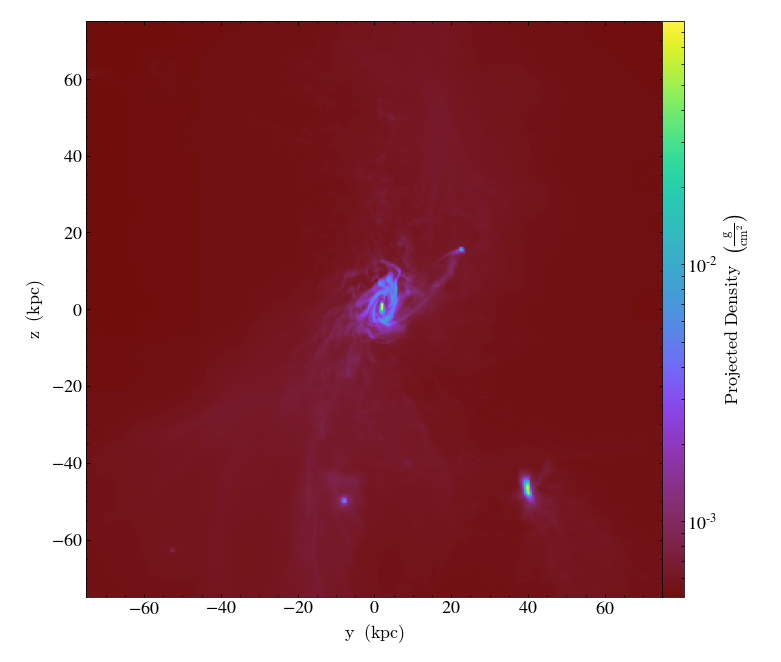

In [7]:
yt.ProjectionPlot(ds2, 'x', 'density', center=cen2, width = (150,'kpc'))

Parsing Hierarchy : 100%|██████████| 4368/4368 [00:00<00:00, 27509.41it/s]
yt : [INFO     ] 2019-01-15 11:55:48,355 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-01-15 11:56:13,088 Projection completed
yt : [INFO     ] 2019-01-15 11:56:13,090 xlim = 37526.187527 37676.187527
yt : [INFO     ] 2019-01-15 11:56:13,092 ylim = 39368.539747 39518.539747
yt : [INFO     ] 2019-01-15 11:56:13,095 xlim = 0.480575 0.482496
yt : [INFO     ] 2019-01-15 11:56:13,096 ylim = 0.504169 0.506090
yt : [INFO     ] 2019-01-15 11:56:13,099 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



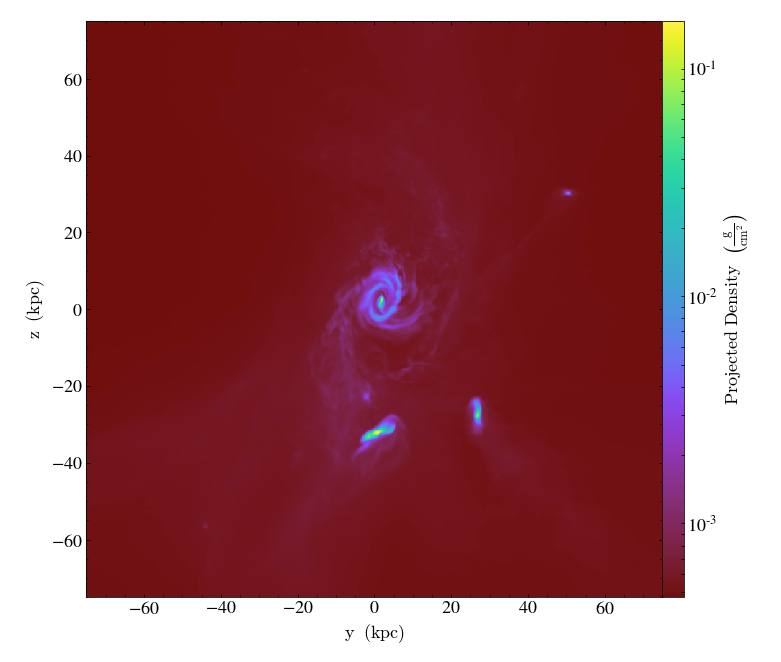

In [8]:
yt.ProjectionPlot(ds3, 'x', 'density', center=cen3, width = (150,'kpc'))

In [ ]:

stars_x   = stars_x_box  - cen[0]
stars_y   = stars_y_box  - cen[0]
stars_z   = stars_z_box  - cen[0]
stars_pos = array([stars_x, stars_y, stars_z])
stars_pos_mag = sqrt(amom.stars_x**2.  + amom.stars_y**2.  + amom.stars_z**2.)


amom.dark_x   = amom.dark_x_box  - amom.cen_x
amom.dark_y   = amom.dark_y_box  - amom.cen_y
amom.dark_z   = amom.dark_z_box  - amom.cen_z
amom.dark_pos = array([amom.dark_x, amom.dark_y, amom.dark_z])
amom.dark_pos_mag = sqrt(amom.dark_x**2.  + amom.dark_y**2.  + amom.dark_z**2.)


#Determine the mass-weighted velocity of the stars in the inner 1 kpc

stars_inner_1kpc = where(amom.stars_pos_mag < 1)[0]
print len(stars_inner_1kpc)
amom.cen_vx = np.average(amom.stars_vx_box[stars_inner_1kpc], weights = amom.star_mass[stars_inner_1kpc])
amom.cen_vy = np.average(amom.stars_vy_box[stars_inner_1kpc], weights = amom.star_mass[stars_inner_1kpc])
amom.cen_vz = np.average(amom.stars_vz_box[stars_inner_1kpc], weights = amom.star_mass[stars_inner_1kpc])


amom.stars_vx  = amom.stars_vx_box - amom.cen_vx
amom.stars_vy  = amom.stars_vy_box - amom.cen_vy
amom.stars_vz  = amom.stars_vz_box - amom.cen_vz
amom.stars_vel = array([amom.stars_vx, amom.stars_vy, amom.stars_vz])
amom.stars_vel_mag = sqrt(amom.stars_vx**2. + amom.stars_vy**2. + amom.stars_vz**2.)



amom.dark_vx  = amom.dark_vx_box - amom.cen_vx
amom.dark_vy  = amom.dark_vy_box - amom.cen_vy
amom.dark_vz  = amom.dark_vz_box - amom.cen_vz
amom.dark_vel = array([amom.dark_vx, amom.dark_vy, amom.dark_vz])
amom.dark_vel_mag = sqrt(amom.dark_vx**2. + amom.dark_vy**2. + amom.dark_vz**2.)




fig, axes = plt.subplots(1,2, figsize = (20,10))

hst, edges = histogram(rd_s, weights = ms_s, bins = linspace(0, xmx, bns))

rds = np.mean([edges[0:len(edges) - 1], edges[1:len(edges)]], axis = 0)


axes[0].hist(rd_s, weights = ms_s, bins = linspace(0, xmx, bns))
axes[1].plot(rds, hst)




peaks, _ = find_peaks(hst, distance = 1.*bns/(xmx-xmn), threshold = 1.e6/(0.2*bns/(xmx-xmn)))

for p in peaks:
    axes[1].axvline(rds[p], color = 'grey')
    


for ax in axes:
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('distance from center (kpc)', fontsize = 30)


    

    
    
    
